In [63]:
%matplotlib inline

# 1. Setup and install libraries

## 1.1. Libraries for reinforcement learning
A few machine learning and reinforcement libraries have been developped. For instance, you can look at :

*    stable baselines: short documentation at https://stable-baselines.readthedocs.io/_/downloads/en/v2.4.0/pdf/ ; long documentation for the version 3 at https://stable-baselines3.readthedocs.io/en/master/guide/rl.html.
  * There is also a page dedicated to imitation on https://imitation.readthedocs.io/en/latest/
*    rlkit library developped by berkeley,. It proposes a reinforcement learning framework and algorithms implemented in PyTorch. The repository is on https://github.com/vitchyr/rlkit/



In [64]:
# # Libraries to use Google Drive. Uncomment if needed
# from google.colab import drive
# from google.colab import output
# drive.mount('/content/gdrive')
# colab_path = "/content/gdrive/My Drive/Colab Notebooks/"

In [65]:
# import sys
# %cd $colab_path
# sys.path.append('.'); sys.argv=['']

Install rendering libraries and gym

In [66]:
!pip3 install setuptools==65.5.0
!pip3 install numpngw
!pip3 install stable_baselines3
!pip install 'shimmy>=0.2.1'

## 1.2. A Robot environment with Pybullet

Robot Learning usually uses a simulator to test the algorithms before deploying on physical robots. Real-time physics simulators reproduces virtual world physics by simulating collision detection as well as soft and rigid body dynamics.

In this session, you can use a robot using pybullet, an easy to use Python module for physics simulation, robotics and deep reinforcement learning based on the Bullet Physics SDK.
Documentation about pybullet can be read on https://pybullet.org/wordpress/index.php/forum-2/. Also ssee PyBullet Quickstart Guide at
https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit .


PyBullet offers several robotics environments:

* The implementation of the Kuka robot arm can be found in https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/bullet/kukaGymEnv.py.

* The implementation of the humanoid, ant ... can be found in https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/gym_locomotion_envs.py.

* The implementation fo the reacher can be found in https://github.com/bulletphysics/bullet3/blob/master/examples/pybullet/gym/pybullet_envs/gym_manipulator_envs.py

* Documentation on the mujoco humanoid environment is : https://github.com/openai/gym/wiki/Humanoid-V1

You can also find a documentation on PyBullet on https://usermanual.wiki/Document/PyBullet20Quickstart20Guide.543993445/html or https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/edit#heading=h.2ye70wns7io3, including the API functions to control the robot from page 18.


In [67]:
# #INSTALL THE PACKAGES
!pip3 install pybullet --upgrade

## 1.3. Load the libraries and setup

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import time
import gym

In [69]:
#connect to the physical simulator
import pybullet
import pybullet_envs
import pybullet_data

datapath = pybullet_data.getDataPath()
pybullet.connect(pybullet.DIRECT)

3

# 2. Reacher

“Reacher” is a two-jointed robot arm. The goal is to move the robot’s end effector (called fingertip) close to a target that is spawned at a random position. More details on https://gymnasium.farama.org/environments/mujoco/reacher/.

An action (a, b) represents the torques applied at the hinge joints.

Observations consist of
*    The cosine of the angles of the two arms
*    The sine of the angles of the two arms
*    The coordinates of the target
*    The angular velocities of the arms
*    The vector between the target and the reacher’s fingertip (3 dimensional with the last element being 0)

The reward consists of two parts:
*    reward_distance: This reward is a measure of how far the fingertip of the reacher (the unattached end) is from the target, with a more negative value assigned for when the reacher’s fingertip is further away from the target. It is calculated as the negative vector norm of (position of the fingertip - position of target), or -norm(“fingertip” - “target”).
*    reward_control: A negative reward for penalising the walker if it takes actions that are too large. It is measured as the negative squared Euclidean norm of the action, i.e. as - sum(action2).

The total reward returned is reward = reward_distance + reward_control



In [70]:
env = gym.make("ReacherBulletEnv-v0")
env.reset()

# Display information about the environment
aspace = env.action_space
ospace = env.observation_space
print("The action space is {}".format(aspace))
print("The dimension of the action space is {}".format(aspace.shape[0]))
print("The observation space is {}".format(ospace))

The action space is Box(-1.0, 1.0, (2,), float32)
The dimension of the action space is 2
The observation space is Box(-inf, inf, (9,), float32)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require 

To display a simulated episode.

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/usr/local/lib/python3.10/dist-packages/gym/utils/pass

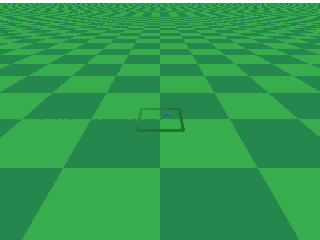

In [71]:
#run an episode of 20 steps
env.reset()
images = []

for i in range(20):
    #env.render(mode="human")
    time.sleep(0.01)
    action = env.action_space.sample()
    # print("action: {}".format(action))
    observation, _, done, info = env.step(action)
    img = env.render(mode='rgb_array')
    images.append(img)


#display the video
from IPython.display import Image
from numpngw import write_apng

# write to a file
write_apng('anim.png', images, delay=20)
# display the image froma file
Image(filename='anim.png')

This video shows that the reacher is unable to reach a point on a table (the square area). Let's see if we can improve it!

## 2.1. Training using SAC with a simulation

SAC (Soft-Actor-Critic) is an off-policy RL algorithm that aims at learning directly a distribution of the policy. It is defined by an Actor-Critic architecture in which a key feature is entropy regularization. The policy is trained to maximize a trade-off between expected return and entropy, a measure of randomness in the policy. This has a close connection to the exploration-exploitation trade-off: increasing entropy results in more exploration, which can accelerate learning later on. It can also prevent the policy from prematurely converging to a bad local optimum. More detail on the algorithm can be read on https://bair.berkeley.edu/blog/2018/12/14/sac/

First, we will consider training an agent with SAC algorithm using the implementation of StableBaselines3. (https://github.com/DLR-RM/stable-baselines3)

<font color='red'> TODO : Train your agent with the  algorithm SAC. Report the performance of your agent by plotting the reward with respect to the training steps. </font>

In [72]:
import os
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env

import torch
import torch.nn as nn
import torch.optim as optim

import subprocess

In [73]:
# Logs of the training
log_dir = "sac_reacher1"
os.makedirs(log_dir, exist_ok=True)
model_name = log_dir +"/sac_reacher1"

### 2.1.1 Training with a simulation

SAC concurrently learns a policy $\pi_{\theta}$ and two Q-functions $Q_{\phi_1}$, $Q_{\phi_2}$. We specify the type of neural networks for both the actor ($\pi_{\theta}$) and the critic (Q-function) with the argument `policy`. We suggest using a general multi-layer perceptron : `MlpPolicy`.

<font color='red'> TODO : Write the code to create the model with algorithm SAC and train it. </font>

For first tests, you can train with total_timesteps=1000.

In [74]:
#TODO : Train your agent with SAC and report the performance

# Model
model = SAC(
    env = env,
    policy = 'MlpPolicy',
    learning_rate = 7.3e-4,
    buffer_size = 300_000,
    batch_size = 256,
    ent_coef = 'auto',
    train_freq = 8,
    gradient_steps = 8,
    learning_starts = 10_000,
    verbose = 1
)

print("Start learning...")
# Training
model.learn(total_timesteps=1_000)

# saving the model to a file
model.save(model_name)
print("Learning is done!")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Start learning...


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -11.2    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 2195     |
|    time_elapsed    | 0        |
|    total_timesteps | 600      |
---------------------------------
Learning is done!


### 2.1.2. Examine the training process

We can examine the log of the training process with the variable `model`.
`model.ep_info_buffer` gives access the training logs.
The training logs is a deque of a set of logs. Each log is a dictionary. Each dictionary corresponds to information about one episode during training. Each dictionary typically contains various pieces of information about the episode. The exact elements of each log can vary depending on the training algorithm and the environment.

However, some common elements you might find in a log include:

*    'r': The total reward obtained in the episode.
*    'l': The length of the episode (i.e., the number of steps taken).
*    't': The time taken to complete the episode.
*    Additional information specific to the environment or algorithm.
    
We can then extract the rewards from the logs with :
`rewards = [log['r'] for log in logs]`

<font color='red'> TODO : write the code to plot the rewards during the learning process </font>

attributes
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_convert_train_freq', '_create_aliases', '_current_progress_remaining', '_custom_logger', '_dump_logs', '_episode_num', '_episode_storage', '_excluded_save_params', '_get_policy_from_name', '_get_torch_save_params', '_init_callback', '_last_episode_starts', '_last_obs', '_last_original_obs', '_n_updates', '_num_timesteps_at_start', '_on_step', '_sample_action', '_setup_learn', '_setup_lr_schedule', '_setup_model', '_stats_window_size', '_store_transition', '_total_timesteps', '_update_current_progress_remaining', '_update_info_buffer', '_update_learning_rate', '_vec_no

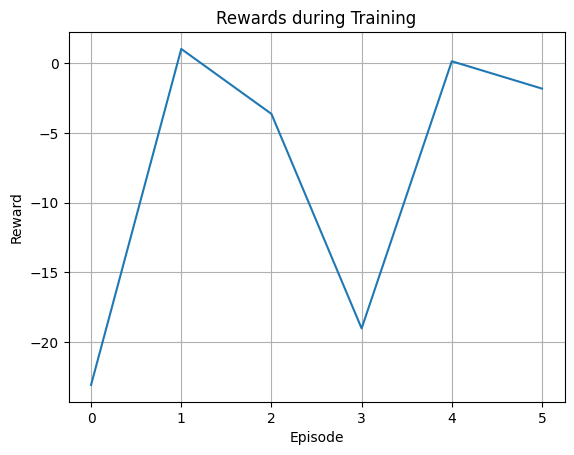

In [75]:
#list the all attributes and methods of model
model = SAC.load(model_name)
attributes = dir(model)
print("attributes")
print(attributes)

# the ep_success_buffer attribute contains a boolean value for each episode, indicating whether the episode achieved its goal or not.
print("ep_success_buffer")
print(model.ep_success_buffer)

# Access the training logs
logs = model.ep_info_buffer
print("logs")
print(logs)
#print(logs[0])
#print(len(logs))

# TODO : write the code to plot the rewards during the learning process
# TODO : Extract the rewards from the logs
rewards =  [log['r'] for log in logs]

# TODO : Plot the rewards
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards during Training')
plt.grid(True)
plt.show()

### 2.1.3. Examine the trained model
After training, we obtain a policy that we can use to test the robot.

<font color='red'> TODO Test the trained model by rolling an episode. Display a simulated episode. </font>

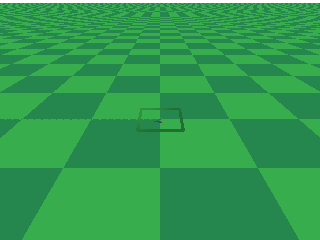

In [76]:
#TODO Test the trained model by rolling an episode until termination
obs = env.reset()
images=[] #list of images to display as a video
reward_list = []

for i in range(200):
    action, _states = model.predict(obs)
    # print("action: {}".format(action))
    obs, reward, done, info = env.step(action)
    img = env.render(mode='rgb_array')
    images.append(img)
    reward_list.append(reward)
    if done:
      break

# Visualise the environment and the robot during the episode.
from IPython.display import Image
from numpngw import write_apng

#imageio.mimsave('a2c.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)
# save to file
write_apng('anim_reachersac.png', images, delay=20)
# display file
Image(filename='anim_reachersac.png')



The reward received by the model after learning is called the test reward.

<font color ='red'> TODO : Plot the test reward for each step of an episode </font>

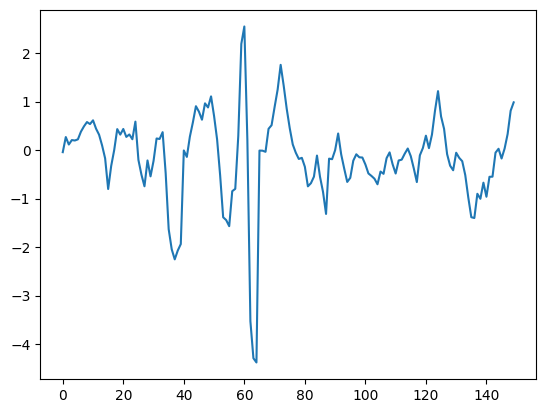

In [77]:
#TODO : Plot the test reward for each step
plt.plot(reward_list)
plt.show()

In the results plotted above, note that since hyperparameters weren't tuned, the results are still improvable. For instance, we can tune :
* learning_rate : learning rate for adam optimizer, the same learning rate will be used for all networks (Q-Values, Actor and Value function)
* buffer_size : size of the replay buffer. Using a large size is the best to avoid catastrphic forgetting.
* batch_size :  Minibatch size for each gradient update
* train_freq : Update the model every train_freq steps.
* gradient_steps :  How many gradient steps to do after each rollout
* learning_starts : Number of steps before learning for the warm-up phase.

<font color='red'> TODO : Please try to improve the hyperparameters. </font>


In [78]:
#We can do a Grid Search on the hyperparameters for the tuning.

## 2.2.  Training with SAC with parallel simulations

<font color='red'>Warning: this part as it is does not run on google colab. Please use your local computer or skip this section </font>

To have statistical results, we can also run the simulations in parallel, thanks to vectorized environments.
Vectorized Environments are a method for stacking multiple independent environments into a single environment. Instead of training an RL agent on 1 environment per step, it allows us to train it on n environments per step. Because of this, actions passed to the environment are now a vector (of dimension n). It is the same for observations, rewards and end of episode signals (dones).

Read more in https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html

In particular, one can create a vectorised gym environment with the function `make_vec_env`. The environment created is used like a normal gym environment, as we have previously seen.

In [79]:
# Logs of the training
log_dir = "sac_reacherv"
os.makedirs(log_dir, exist_ok=True)
vmodel_name = log_dir+"/sac_reacherv"

<font color='red'> TODO : Write the code to create the vectorized environment, the model with algorithm SAC and train it. </font>

In [80]:
#This question will be skipped as I am using Colab and I am allowed to use only one environment.

In [81]:
"""# TODO : create the Vectorized Environment "ReacherBulletEnv-v0"
# with n_envs parallel simulations and to record the logs in folder log_dir
n_envs=4 # number of parallel simulations. TODO: tune this parameter for your computer
venv = make_vec_env("ReacherBulletEnv-v0", n_envs, log_dir)

# Credit to the RL-Zoo3 git that gives the hyperparemeters of the algorithm: https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/sac.yml
# TODO : Create a Model
vmodelsac = SAC(
    env = venv,
    policy = 'MlpPolicy',
    learning_rate = 7.3e-4,
    buffer_size = 300_000,
    batch_size = 256,
    ent_coef = 'auto',
    train_freq = 8,
    gradient_steps = 8,
    learning_starts = 10_000,
    verbose = 1
    )

print("Start learning...")
# TODO : Training
vmodelsac.learn(total_timesteps=1_000)

print("Learning is done!")
"""

'# TODO : create the Vectorized Environment "ReacherBulletEnv-v0"\n# with n_envs parallel simulations and to record the logs in folder log_dir\nn_envs=4 # number of parallel simulations. TODO: tune this parameter for your computer\nvenv = make_vec_env("ReacherBulletEnv-v0", n_envs, log_dir)\n\n# Credit to the RL-Zoo3 git that gives the hyperparemeters of the algorithm: https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/sac.yml\n# TODO : Create a Model\nvmodelsac = SAC(\n    env = venv,\n    policy = \'MlpPolicy\',\n    learning_rate = 7.3e-4,\n    buffer_size = 300_000,\n    batch_size = 256,\n    ent_coef = \'auto\',\n    train_freq = 8,\n    gradient_steps = 8,\n    learning_starts = 10_000,\n    verbose = 1\n    )\n\nprint("Start learning...")\n# TODO : Training\nvmodelsac.learn(total_timesteps=1_000)\n\nprint("Learning is done!")\n'

In [82]:
"""#save model to a file
vmodelsac.save(vmodel_name)"""

'#save model to a file\nvmodelsac.save(vmodel_name)'

### 2.2.1.  Examine the training process

We examine the training reward over all n_env simulations and plot the mean reward.

<font color='red'> TODO : using the learned model `vmodelsac`, plot the reward during learning </font>

In [83]:
"""# TODO : from the attribute ep_info_buffer, extract the log of rewards
# TODO: Extract the rewards from the logs
# TODO : Plot the rewards
logs = vmodelsac.ep_info_buffer

rewards = [log['r'] for log in logs]

plt.plot(np.arange(len(rewards)), rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward during Learning')
plt.grid(True)
plt.show()"""

"# TODO : from the attribute ep_info_buffer, extract the log of rewards\n# TODO: Extract the rewards from the logs\n# TODO : Plot the rewards\nlogs = vmodelsac.ep_info_buffer\n\nrewards = [log['r'] for log in logs]\n\nplt.plot(np.arange(len(rewards)), rewards)\nplt.xlabel('Episode')\nplt.ylabel('Reward')\nplt.title('Reward during Learning')\nplt.grid(True)\nplt.show()"

With the previous method, we only accessed to the mean reward. We did not plot the standard deviation. The standard variation is used to evaluate the variance of the algorithm.

Amother method is to exploit the recorded files.
We saved for each simulation in folder log_dir log files in csv format. The files are named like "0.monitor.csv
1.monitor.csv, 2.monitor.csv, 3.monitor.csv". Each contain the log with each line the values of (r,l,t).

<font color ='blue'> Open each file to record the rewards and plot the mean and standard deviation </font>

In [84]:
"""# This cell aims to plot the mean reward and its standard deviation over the n_env simulations

plt.figure()
num_episode_max = 10_000
reward_dict = {} #reward_dict is a dictionary associating to each simulation a list of training rewards

# List all files in the folder
files = os.listdir(log_dir)
# Select only the csv files
files_filtered = [file for file in files if file.endswith('.csv')]

#for each file corresponding to each of the n_env simulation
for file in files_filtered:
    monitor_id = file.split(".")[1] + "_" + file.split(".")[0]
    data_file = log_dir +"/"+ file

    #initialise the list of rewards
    reward_dict[monitor_id] = []

    # Read the reward from log file
    num_episodes = 0
    with open(data_file, 'r') as monitor:
        for index, line in enumerate(monitor):
            if index >= 2:
                reward = float(line.split(",")[0])
                reward = np.asarray(reward)
                reward_dict[monitor_id].append(reward)
                num_episodes += 1

    if num_episodes < num_episode_max:
        num_episode_max = num_episodes

reward_dict = dict(sorted(reward_dict.items()))

# put the reward values in the right format to compute the mean and std
reward = []
for monitor, rewards in reward_dict.items():
    reward.append(rewards[:num_episode_max])

reward = np.asarray(reward)
# reward is now an array of rewards over the n_env simulations
# axis 0 represents the n_env simulations

# Computation of the mean and the standard variation of the total reward for the n_env simulations
mean_reward = np.mean(reward, axis=0)
std_reward = np.std(reward, axis=0)

x = np.linspace(0, num_episode_max, len(mean_reward))

# Plot of the figure
plt.plot(x, mean_reward, color="blue", label=f"Mean")
plt.fill_between(x, mean_reward - std_reward, mean_reward + std_reward, color="blue", alpha=0.2, label=f"Mean +- Std")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.show()"""

'# This cell aims to plot the mean reward and its standard deviation over the n_env simulations\n\nplt.figure()\nnum_episode_max = 10_000\nreward_dict = {} #reward_dict is a dictionary associating to each simulation a list of training rewards\n\n# List all files in the folder\nfiles = os.listdir(log_dir)\n# Select only the csv files\nfiles_filtered = [file for file in files if file.endswith(\'.csv\')]\n\n#for each file corresponding to each of the n_env simulation\nfor file in files_filtered:\n    monitor_id = file.split(".")[1] + "_" + file.split(".")[0]\n    data_file = log_dir +"/"+ file\n\n    #initialise the list of rewards\n    reward_dict[monitor_id] = []\n\n    # Read the reward from log file\n    num_episodes = 0\n    with open(data_file, \'r\') as monitor:\n        for index, line in enumerate(monitor):\n            if index >= 2:\n                reward = float(line.split(",")[0])\n                reward = np.asarray(reward)\n                reward_dict[monitor_id].append(re

In [85]:
# Here we plot the reward for each environment. We will get a plot of the mean
# reward with its standard deviation.

# 3. Reacher bis: PPO
In this part, we use the same robot but try a different algorithm : PPO

## 3.1. Training of the robot using PPO

PPO, or Proximal Policy Optimization, is a reinforcement learning algorithm in the family of policy gradient methods. It focuses on stability and sample efficiency by constraining the size of policy updates, preventing large policy changes. This makes it robust, easy to implement, and effective with fewer samples compared to other methods. It was proposed in 2017 : see https://spinningup.openai.com/en/latest/algorithms/ppo.html or the article  https://arxiv.org/abs/1707.06347.

What makes PPO different from earlier policy gradient methods like REINFORCE is its focus on stability and sample efficiency. PPO addresses some of the instability issues associated with earlier methods by constraining the size of policy updates, preventing large policy changes that could lead to catastrophic performance changes.

The "Proximal" part of PPO refers to the fact that it limits how much the new policy can deviate from the old policy in each update, ensuring that the policy updates are "locally" close to the previous policy, thus preventing large policy changes.



In [86]:
import os
from stable_baselines3 import SAC, PPO
from stable_baselines3.common.env_util import make_vec_env

import torch
import torch.nn as nn
import torch.optim as optim

import subprocess

In [87]:
env = gym.make("ReacherBulletEnv-v0")
env.reset()

array([ 0.23933839, -0.1418458 , -0.32802547,  0.3037435 , -0.49829068,
        0.86701004,  0.        , -0.33171723,  0.        ])

In [88]:
# Logs of the training
log_dir = "ppo_reacher_logs"
os.makedirs(log_dir, exist_ok=True)
vmodel_name = log_dir + "/ppo_reacherv"

We conduct the training in n_env simulations in parallel as before

<font color='red'> TODO : Train your agent with the algorithm PPO. The documentation of stable baselines can be read on https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html </font>. Write the code to create the vectorized environment with n_env simulations and record the logs in log_dir, to create the PPO model and to train the model.

In [89]:
#TODO : create the vectorized environment with n_env simulations and record the logs in log_dir
# Environment
env = gym.make("ReacherBulletEnv-v0")


# TODO: create Model using PPO
vmodel = PPO(
    policy = "MlpPolicy",
    env = env,
    learning_rate = 0.0003,
    n_steps= 2048,
    batch_size= 64,
    ent_coef= 0.0,
    gamma= 0.99,
    gae_lambda= 0.95,
    max_grad_norm= 0.5,
    vf_coef= 0.5,
    clip_range= 0.2,
    n_epochs= 10,
    verbose= 1,
    )

# TODO : Training the model
print("Start learning...")
vmodel.learn(total_timesteps=1_000)

#save the obtained model
vmodel.save(vmodel_name)
print("Learning is done!")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Start learning...
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 150      |
|    ep_rew_mean     | -13.3    |
| time/              |          |
|    fps             | 732      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
Learning is done!


<font color='blue'> This time, PPO algorithm is slow to increase, but based on our experiments, is worse than SAC. One hypothesis is that updates aren't small enough between each iteration, which makes PPO algorithm quite inefficient. </font>

## 3.2. Examine the obtained policy


<font color='red'> TODO: Using the obtained policy, display a simulated episode.
</font>

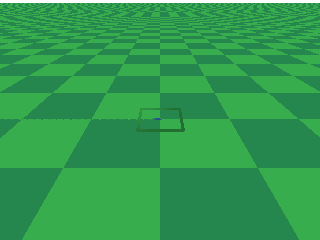

In [90]:
#TODO: Using the obtained policy, visualise with a video an episode.
obs = env.reset()
images=[] #list of images to display as a video
reward_list = []

for i in range(200):
    action, _states = vmodel.predict(obs)
    # print("action: {}".format(action))
    obs, reward, done, info = env.step(action)
    img = env.render(mode='rgb_array')
    images.append(img)
    reward_list.append(reward)
    if done:
      break

# Save video to file and display
from IPython.display import Image
from numpngw import write_apng

#imageio.mimsave('a2c.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)
write_apng('anim_reacher_from_ppo.png', images, delay=20)
Image(filename='anim_reacher_from_ppo.png')

## 3.3. Examine the training process

<font color ='red'> TODO : Plot the mean reward using the logs of ep_info_buffer </font>

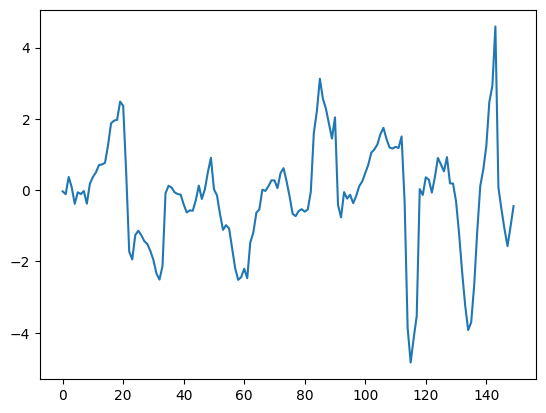

In [91]:
#TODO : Plot the mean reward using the logs of the attribute ep_info_buffer
plt.plot(reward_list)
plt.show()

Only applicable if you used a vectorized environment. If you used a normal gym environment with 1 simulation, skip this questions.

<font color ='red'>  TODO : Plot the mean reward and its standard deviation using the log files </font>

In [92]:
#This question will be skipped as I am using Colab and I am allowed to use only one environment.

In [93]:
"""# This cell aims to plot the mean reward and its standard deviation over the n_env simulations

plt.figure()
num_episode_max = 10_000
reward_dict = {} #reward_dict is a dictionary associating to each simulation a list of training rewards

# List all files in the folder
files = os.listdir(log_dir)
# Select only the csv files
files_filtered = [file for file in files if file.endswith('.csv')]

#for each file corresponding to each of the n_env simulation
for file in files_filtered:
    monitor_id = file.split(".")[1] + "_" + file.split(".")[0]
    data_file = log_dir +"/"+ file

    #initialise the list of rewards
    reward_dict[monitor_id] = []

    # Read the reward from log file
    num_episodes = 0
    with open(data_file, 'r') as monitor:
        for index, line in enumerate(monitor):
            if index >= 2:
                reward = float(line.split(",")[0])
                reward = np.asarray(reward)
                reward_dict[monitor_id].append(reward)
                num_episodes += 1

    if num_episodes < num_episode_max:
        num_episode_max = num_episodes

reward_dict = dict(sorted(reward_dict.items()))

# put the reward values in the right format to compute the mean and std
reward = []
for monitor, rewards in reward_dict.items():
    reward.append(rewards[:num_episode_max])

reward = np.asarray(reward)
# reward is now an array of rewards over the n_env simulations
# axis 0 represents the n_env simulations

# TODO : Computation of the mean and the standard variation of the total reward for the n_env simulations
....

#  TODO : Plot of the figure
..."""

'# This cell aims to plot the mean reward and its standard deviation over the n_env simulations\n\nplt.figure()\nnum_episode_max = 10_000\nreward_dict = {} #reward_dict is a dictionary associating to each simulation a list of training rewards\n\n# List all files in the folder\nfiles = os.listdir(log_dir)\n# Select only the csv files\nfiles_filtered = [file for file in files if file.endswith(\'.csv\')]\n\n#for each file corresponding to each of the n_env simulation\nfor file in files_filtered:\n    monitor_id = file.split(".")[1] + "_" + file.split(".")[0]\n    data_file = log_dir +"/"+ file\n\n    #initialise the list of rewards\n    reward_dict[monitor_id] = []\n\n    # Read the reward from log file\n    num_episodes = 0\n    with open(data_file, \'r\') as monitor:\n        for index, line in enumerate(monitor):\n            if index >= 2:\n                reward = float(line.split(",")[0])\n                reward = np.asarray(reward)\n                reward_dict[monitor_id].append(re


<font color='blue'> Answer: write your analysis here.  </font>

# 4. Ant

The ant is a typical environment where a 4-legged agent learns locomotion. This environment is based on the environment introduced by Schulman, Moritz, Levine, Jordan and Abbeel in “High-Dimensional Continuous Control Using Generalized Advantage Estimation”. The ant is a 3D robot consisting of one torso (free rotational body) with four legs attached to it with each leg having two body parts. The goal is to coordinate the four legs to move in the forward (right) direction by applying torques on the eight hinges connecting the two body parts of each leg and the torso (nine body parts and eight hinges).

We will experiment with the Ant environment

In [94]:
import gym
import numpy as np

from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

# Create and wrap the environment
env = gym.make('AntBulletEnv-v0')

## 4.1. TD3 algorithm

Let us train with TD3 algorithm.

Twin Delayed DDPG (TD3) is a reinforcement learning algorithm of the family of Actor-Critic Methods.
TD3 is a direct successor of DDPG and improves it using three major tricks:

- Clipped Double-Q Learning. TD3 learns two Q-functions instead of one (hence “twin”), and uses the smaller of the two Q-values to form the targets in the Bellman error loss functions.

-  “Delayed” Policy Updates. TD3 updates the policy (and target networks) less frequently than the Q-function. The paper recommends one policy update for every two Q-function updates.

- Target Policy Smoothing. TD3 adds noise to the target action, to make it harder for the policy to exploit Q-function errors by smoothing out Q along changes in action.

The stable baselines documentation for TD3 can be read on : https://stable-baselines3.readthedocs.io/en/master/modules/td3.html

In [95]:
# Logs of the training
log_dir = "td3_ant_logs"
os.makedirs(log_dir, exist_ok=True)
amodel_name = log_dir + "/td3_ant"


TD3 concurrently learns two Q-functions, Q_{\phi_1} and Q_{\phi_2}, by mean square Bellman error minimization, in almost the same way that DDPG learns its single Q-function.  To create a model, we must specify the architecture of the neural networks for the actor and the critic. We will use here `MlpPolicy`.

With the Target Policy Smoothing trick, TD3 adds noise to the target action.  We first define a noise object and pass it as the argument `action_noise` when we create the model

In [96]:
# Define the noise object
n_actions = env.action_space.shape[-1]
noise_stddev = 0.2
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=noise_stddev * np.ones(n_actions))

<font color='red'> TODO : Create the model and train it </font>

In [97]:
# TODO : Create the TD3 agent
amodel = TD3(
    ...
            )

# TODO : train the model
...

#save the model to file
amodel.save(amodel_name)

TypeError: TD3.__init__() missing 1 required positional argument: 'env'

## 4.2. Examine the training process


<font color='red'> TODO : Plot a figure to sum up the training of simulations showing the mean of the reward during training.   <font>


In [ ]:
#TODO :Plot the mean of the reward per episode


# Access the training logs
...

# Extract the rewards from the logs
...

# Plot the rewards
....

## 4.3. Examine the test results

<font color='red'> TODO: launch simulations with the learned model and report the average  test reward over each episode </font>

In [ ]:
# TODO : Evaluate the model on the environment

rewards = []
....


# TODO : Compute the average reward over the episodes
...
avg_reward = ...

print(f"Average reward: {avg_reward}")


<font color='red'> TODO : show a visualisation of the agent in his environment during an episode </font>

In [ ]:
# TODO run an episode
images = []

...


# save to file and display the video
from IPython.display import Image
# !pip3 install numpngw
from numpngw import write_apng

#imageio.mimsave('a2c.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)
write_apng('anim_anttd3.png', images, delay=20)
Image(filename='anim_anttd3.png')

# 5. Humanoid Robot

The 3D bipedal robot is designed to simulate a human. It has a torso (abdomen) with a pair of legs and arms. The legs each consist of three body parts, and the arms 2 body parts (representing the knees and elbows respectively). The goal of the environment is to walk forward as fast as possible without falling over. This environment is based on the environment introduced by Tassa, Erez and Todorov in “Synthesis and stabilization of complex behaviors through online trajectory optimization”.

The action space is a Box(-1, 1, (17,), float32). An action represents the torques applied at the 17 hinge joints.
Observations consist of positional values of different body parts of the Humanoid, followed by the velocities of those individual parts.
The reward consists of roughly of two parts:

*    healthy_reward: Every timestep that the humanoid is alive (see section Episode Termination for definition), it gets a reward of fixed value healthy_reward

*    forward_reward: A reward of walking forward which is proportional to : (average center of mass before action - average center of mass after action)/dt.

 Below is an example code to run the Humanoid environment.

In [ ]:
env = gym.make("HumanoidBulletEnv-v0")

# Display information about the environment
aspace = env.action_space
ospace = env.observation_space
print("The action space is {}".format(aspace))
print("The dimension of the action space is {}".format(aspace.shape[0]))
print("The observation space is {}".format(ospace))

To display a simulated episode.

In [ ]:
#run an episode of 20 steps
env.reset()
images = []

for i in range(100):
    #env.render(mode="human")
    time.sleep(0.01)
    action = env.action_space.sample()
    # print("action: {}".format(action))
    observation, _, done, info = env.step(action)
    img = env.render(mode='rgb_array')
    images.append(img)


#display the video
from IPython.display import Image
# !pip3 install numpngw
from numpngw import write_apng

#imageio.mimsave('a2c.gif', [np.array(img) for i, img in enumerate(images) if i%2 == 0], fps=29)
write_apng('anim.png', images, delay=20)
Image(filename='anim.png')

## 5.1 Training using SAC

In [ ]:
import os
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env

import torch
import torch.nn as nn
import torch.optim as optim

import subprocess

In [ ]:
# Logs of the training
log_dir = "sac_humanoid_logs"
os.makedirs(log_dir, exist_ok=True)

# Model
model_name = log_dir+"/sac_humanoid"

<font color='red'> TODO : Train your agent with the algorithm SAC using stable_baselines library:https://stable-baselines3.readthedocs.io/en/master/modules/sac.html.
Report the performance of your agent by plotting the reward with respect to the training steps.
</font>

In [ ]:
#TODO : Train your agent with SAC and report the performance

# TODO: create the environment
....

# Credit to the RL-Zoo3 git that gives the hyperparemeters of the algorithm: https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/sac.yml
# TODO : create the SAC model
hmodel = SAC(
        ...
    )

print("Start learning...")
# TODO Training
...

#save to file
hmodel.save(model_name)
print("Learning is done!")



## 5.2. Examine the training process

<font color ='red'> TODO : Plot the  mean reward and its standard deviation </font>

In [ ]:
# This cell aims to plot the mean reward and its standard deviation over the n_env simulations

plt.figure()
num_episode_max = 10_000_000
reward_dict = {} #reward_dict is a dictionary associating to each simulation a list of training rewards

# List all files in the folder
files = os.listdir(log_dir)
# Select only the csv files
files_filtered = [file for file in files if file.endswith('.csv')]

#for each file corresponding to each of the n_env simulation
for file in files_filtered:
    monitor_id = file.split(".")[1] + "_" + file.split(".")[0]
    data_file = log_dir +"/"+ file

    #initialise the list of rewards
    reward_dict[monitor_id] = []

    # Read the reward from log file
    num_episodes = 0
    with open(data_file, 'r') as monitor:
        for index, line in enumerate(monitor):
            if index >= 2:
                reward = float(line.split(",")[0])
                reward = np.asarray(reward)
                reward_dict[monitor_id].append(reward)
                num_episodes += 1

    if num_episodes < num_episode_max:
        num_episode_max = num_episodes

reward_dict = dict(sorted(reward_dict.items()))

# put the reward values in the right format to compute the mean and std
reward = []
for monitor, rewards in reward_dict.items():
    reward.append(rewards[:num_episode_max])

reward = np.asarray(reward)
# reward is now an array of rewards over the n_env simulations
# axis 0 represents the n_env simulations

# TODO : Computation of the mean and the standard variation of the total reward for the n_env simulations
...


# Plot of the figure
...


<font color='red'> TODO :  Optimise the hyperparameters and Comment the results </font>


## 5.3. Examine the obtained policy

<font color ='red'> TODO : Display a video of an episode with the learned policy </font>

In [ ]:
#TODO : Display a video of an episode with the learned policy
images = []
#run an episode
...

#display the video
write_apng('anim_hsac.png', images, delay=20)
Image(filename='anim_hsac.png')